<a href="https://colab.research.google.com/github/sarakhaderkoko1233-wq/ML-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.compose import ColumnTransformer

#download data
aisles=pd.read_csv('/content/aisles.csv')
departments=pd.read_csv('/content/departments.csv')
order_products__train=pd.read_csv('/content/order_products__train.csv')
order_products__prior=pd.read_csv('/content/order_products__prior.csv', on_bad_lines='skip')
products=pd.read_csv('/content/products.csv')
orders=pd.read_csv('/content/orders.csv',engine='python',on_bad_lines='skip')

In [17]:
#departments
print("head:",departments.head())
print("info:",departments.info())
print("discribe:",departments.describe())
print("sum os nulls:",departments.isnull().sum())
print("is it duplicated?",departments.duplicated().any())
print("-----------------------------------")
#order product train
print("head:", order_products__train.head())
print("info:", order_products__train.info())
print("discribe:", order_products__train.describe())
print("sum of nulls:", order_products__train.isnull().sum())
print("is it duplicated?", order_products__train.duplicated().any())
print("-----------------------------------")
#products
print("head:", products.head())
print("info:",products.info())
print("discribe:", products.describe())
print("sum of nulls:", products.isnull().sum())
print("is it duplicated?",products.duplicated().any())
print("-----------------------------------")
#orders
print("head:", orders.head())
print("info:", orders.info())
print("discribe:",orders.describe())
print("is it null?",orders.isnull().sum())
#aisles
print("head:", aisles.head())
print("info:", aisles.info())
print("discribe:", aisles.describe())
print("is it null?", aisles.isnull().sum())





head:    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
info: None
discribe:        department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000
sum os nulls: department_id    0
department       0
dtype: int64
is it duplicated? False
-----------------------------------
head:    order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2      

In [16]:
#merging
df=order_products__train.merge(orders,on='order_id',how='left')
df=df.merge(products,on='product_id',how='left')
df=df.merge(departments,on='department_id',how='left')
df=df.merge(aisles,on='aisle_id',how='left')
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   user_id                 1384617 non-null  int64  
 5   eval_set                1384617 non-null  object 
 6   order_number            1384617 non-null  int64  
 7   order_dow               1384617 non-null  int64  
 8   order_hour_of_day       1384617 non-null  int64  
 9   days_since_prior_order  1384617 non-null  float64
 10  product_name            1384617 non-null  object 
 11  aisle_id                1384617 non-null  int64  
 12  department_id           1384617 non-null  int64  
 13  department              1384617 non-null  object 
 14  ai

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


In [9]:
df['days_since_prior_order'].isnull().sum()

np.int64(0)

In [5]:

num_col=['add_to_cart_order','days_since_prior_order','order_number','order_dow','order_hour_of_day']
num_imputer=SimpleImputer(strategy='median')
df[num_col]=num_imputer.fit_transform(df[num_col])

df['eval_set']=df['eval_set'].fillna('missing')
df['aisle']=df['aisle'].fillna('missing')
df['department']=df['department'].fillna('missing')
df=df.dropna(subset=['user_id'])

df.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


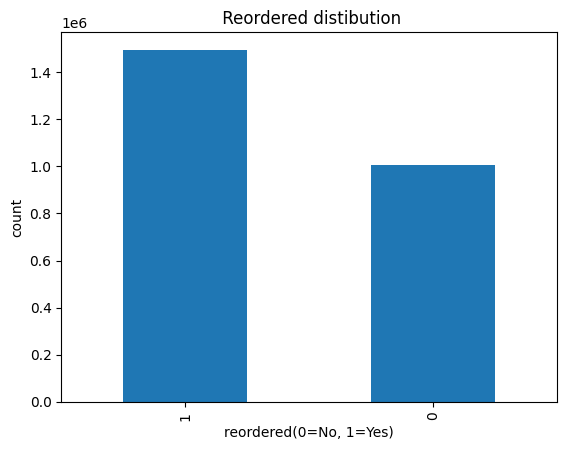

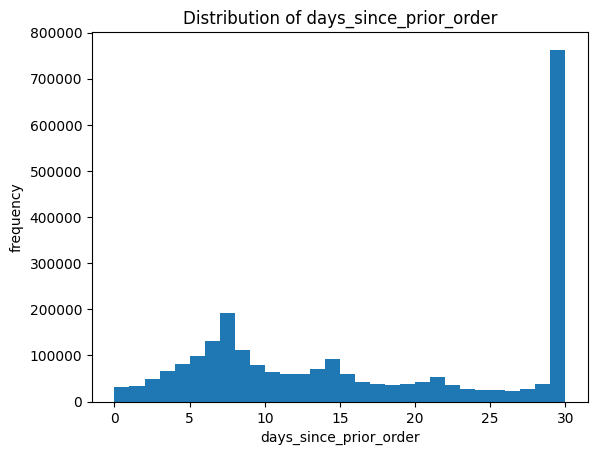

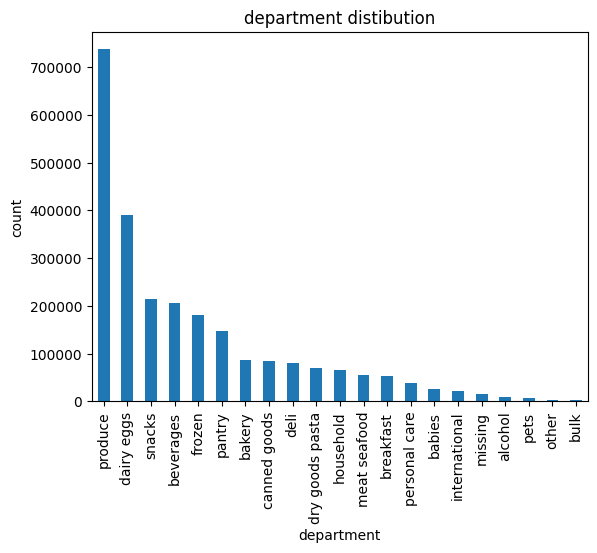

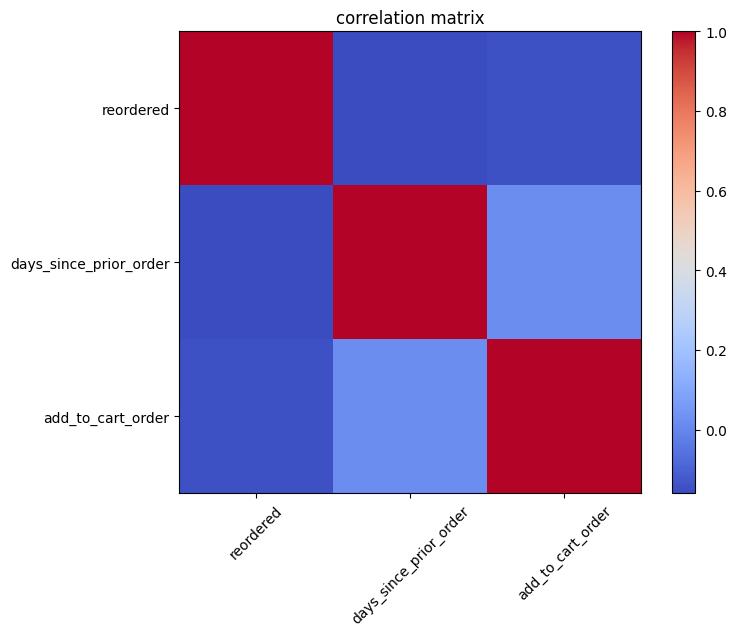

In [ ]:
df['reordered'].value_counts().plot(kind='bar')
plt.xlabel('reordered(0=No, 1=Yes)')
plt.ylabel('count')
plt.title(' Reordered distibution')
plt.show()

plt.hist(df['days_since_prior_order'],bins=30)
plt.xlabel('days_since_prior_order')
plt.ylabel('frequency')
plt.title('Distribution of days_since_prior_order')
plt.show()

df['department'].value_counts().plot(kind='bar')
plt.xlabel('department')
plt.ylabel('count')
plt.title('department distibution')
plt.show()

corr=df[['reordered','days_since_prior_order','add_to_cart_order']].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr,cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)),corr.columns,rotation=45)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.title('correlation matrix')
plt.show()

In [ ]:
df_encoded=pd.get_dummies(df,columns=['department'])
df_encoded.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
1,1,49302,1.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,49302,1.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
4,1,11109,2.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
5,1,11109,2.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
7,1,10246,3.0,0,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
x=df_encoded.drop('reordered',axis=1)
y=df_encoded['reordered']
x_train=x[df_encoded['eval_set']=='train']
x_test=x[df_encoded['eval_set']=='test']
y_train=y[df_encoded['eval_set']=='train']
y_test=y[df_encoded['eval_set']=='test']
df.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
1,1,49302,1.0,1,112108,train,4.0,4.0,10.0,9.0,Bulgarian Yogurt,120,16,dairy eggs
2,1,49302,1.0,1,112108,train,4.0,4.0,10.0,9.0,Bulgarian Yogurt,120,16,dairy eggs
4,1,11109,2.0,1,112108,train,4.0,4.0,10.0,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
5,1,11109,2.0,1,112108,train,4.0,4.0,10.0,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
7,1,10246,3.0,0,112108,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83,4,produce


In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler , MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import train_test_split
#from sklearn.compose import ColumnTransformer

#departments=pd.read_csv('departments.csv')
#order_products__train=pd.read_csv('order_products__train.csv')
#products=pd.read_csv('products.csv')
#orders=pd.read_csv('orders.csv')

#departments.head()
#departments.info()
#departments.describe()
#departments.drop([1,20],inplace=True)
#print(departments.head())
#departments_encoded=pd.get_dummies(departments,columns=['department'])
#print(departments_encoded.head())
#print(departments_encoded.shape)
#print(departments_encoded.duplicated().any())
#print(departments_encoded.isnull().sum())


#order_products__train.head()
#order_products__train.info()
#order_products__train.describe()
#order_products__train_encoded=pd.get_dummies(order_products__train)
#print(order_products__train.duplicated().any())
#print(order_products__train.isnull().sum())


#products.head()
#products.info()
#products.describe()


#ord=LabelEncoder()
#orders['eval_set']=ord.fit_transform(orders[['eval_set']])
#orders_train=orders[orders['eval_set']==1]
#orders_test=orders[orders['eval_set']==2]

#num_att=['days_since_prior_order']
#num_pipline=Pipeline([('imputer',SimpleImputer(strategy='median')),('standarize',StandardScaler())])
#preprocessing=ColumnTransformer([('num',num_pipline,num_att)])
#orders_scaled=preprocessing.fit_transform(orders)
#print(orders_scaled[:10])

#x_train=preprocessing.fit_transform(orders_train)
#x_test=preprocessing.transform(orders_test)
#print("------------------------------------------")
#print("x_train",x_train[:10])
#print("x_test",x_test[:10])